In [1]:
import math
import matplotlib.pyplot
import numpy
import pandas

%matplotlib notebook

# Load Example Dataset

In [2]:
example_dataset = pandas.read_csv('project-files/example-dataset.csv')
example_dataset.drop(example_dataset.columns[0], axis=1, inplace=True)
print(example_dataset)

       Total Spend
0       8614232354
1       6482372250
2       4762102042
3       4061031881
4       3935450949
5       3151757680
6        970717899
7        886580755
8        750164161
9        732230259
10       717540492
11       697971689
12       669689594
13       610345219
14       604415490
15       595622784
16       593431527
17       423759947
18       274927782
19       274470609
20       266344698
21       263843691
22        99754705
23        98542325
24        97255251
25        97237865
26        95305780
27        94924612
28        94245020
29        93896780
...            ...
99970         1003
99971         1003
99972         1003
99973         1002
99974         1002
99975         1002
99976         1002
99977         1002
99978         1002
99979         1002
99980         1002
99981         1001
99982         1001
99983         1001
99984         1001
99985         1001
99986         1001
99987         1001
99988         1001
99989         1001
99990       

# Visualization 1
### Total Spend Summary Table

In [3]:
total_spend_max = example_dataset.iloc[0]['Total Spend']
total_spend_min = example_dataset.iloc[-1]['Total Spend']
order_of_magnitude_max = math.floor(math.log10(total_spend_max))
order_of_magnitude_min = math.floor(math.log10(total_spend_min))
orders_of_magnitude = numpy.arange(order_of_magnitude_max, order_of_magnitude_min-1, -1)
print(orders_of_magnitude)

[9 8 7 6 5 4 3]


In [4]:
total_spend = numpy.power(10, orders_of_magnitude)
print(total_spend)

[1000000000  100000000   10000000    1000000     100000      10000
       1000]


In [5]:
number_of_professionals = numpy.zeros_like(orders_of_magnitude)
for i, order_of_magnitude in enumerate(orders_of_magnitude):
    total_spend_min = numpy.power(10, order_of_magnitude)
    total_spend_max = numpy.power(10, order_of_magnitude+1)
    number_of_professionals[i] = ((example_dataset['Total Spend'] >= total_spend_min) &
                                  (example_dataset['Total Spend'] < total_spend_max)).sum()
print(number_of_professionals)

[    6    16   153   704  5664 28471 64986]


In [6]:
number_of_professionals_table = pandas.DataFrame()
number_of_professionals_table['Total Spend'] = total_spend
number_of_professionals_table['Number of Professionals'] = number_of_professionals
print(number_of_professionals_table)

   Total Spend  Number of Professionals
0   1000000000                        6
1    100000000                       16
2     10000000                      153
3      1000000                      704
4       100000                     5664
5        10000                    28471
6         1000                    64986


| Total Spend             | Number of Professionals  |
|-------------------------|--------------------------|
|  $\geq \$1\mathrm{B}$   |         6                |
|  $\geq \$100\mathrm{M}$ |        16                |
|  $\geq \$10\mathrm{M}$  |       153                |
|  $\geq \$1\mathrm{M}$   |       704                |
|  $\geq \$100\mathrm{K}$ |      5664                |
|  $\geq \$10\mathrm{K}$  |     28471                |
|  $\geq \$1\mathrm{K}$   |     64986                |

# Visualization 2
### Total Spend Summary Bar Chart

In [7]:
symbol_vs_scale = {0: '', 1: 'K', 2: 'M', 3: 'B', 4: 'T'}
xticklabels = []
for order_of_magnitude in orders_of_magnitude:
    power = order_of_magnitude % 3
    number = numpy.power(10, power)
    scale = math.floor(order_of_magnitude/3)
    symbol = symbol_vs_scale[scale]
    xticklabel = '$' + str(number) + symbol
    xticklabels.append(xticklabel)
print(xticklabels)

['$1B', '$100M', '$10M', '$1M', '$100K', '$10K', '$1K']


In [8]:
number_of_professionals_order_of_magnitude_max = math.floor(math.log10(number_of_professionals.max()))
print(number_of_professionals_order_of_magnitude_max)

4


In [9]:
yticks = numpy.power(10, numpy.arange(0, number_of_professionals_order_of_magnitude_max+2))
print(yticks)

[     1     10    100   1000  10000 100000]


In [10]:
yticklabels = ['{:,}'.format(ytick) for ytick in yticks]
print(yticklabels)

['1', '10', '100', '1,000', '10,000', '100,000']


<IPython.core.display.Javascript object>


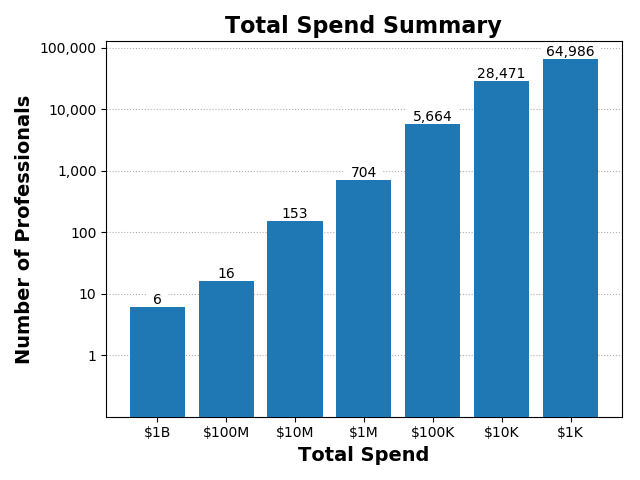

In [11]:
figure, axes = matplotlib.pyplot.subplots()
axes.bar(orders_of_magnitude, number_of_professionals, bottom=0.1, zorder=10)
axes.set_yscale('log')
axes.minorticks_off()
axes.invert_xaxis()
axes.set_xticks(orders_of_magnitude)
axes.set_xticklabels(xticklabels)
axes.set_yticks(yticks)
axes.set_yticklabels(yticklabels)
axes.set_xlabel('Total Spend', fontsize=14, fontweight='bold')
axes.set_ylabel('Number of Professionals', fontsize=14, fontweight='bold')
axes.set_title('Total Spend Summary', fontsize=16, fontweight='bold')
######################################################
## display 'number of professionals' above each bar ##
######################################################
for i, order_of_magnitude in enumerate(orders_of_magnitude):
    yvalue = number_of_professionals_table.iloc[i]['Number of Professionals']
    text = axes.text(order_of_magnitude, yvalue, '{:,}'.format(yvalue),
              horizontalalignment='center', verticalalignment='bottom')
    ################################
    ## text bounding box          ##
    ##   above y-grid, below bars ##
    ################################
    text.set_bbox(dict(facecolor='white', alpha=1, edgecolor='none', zorder=1))
##############################################
## y-grid below bars and numbers            ##
## x-axis top spine above text bounding box ##
##############################################
axes.set_axisbelow(True)
axes.spines['top'].set_zorder(100)
axes.yaxis.grid('True', linestyle=':')
##################################################
## tight_layout()                               ##
##   adjusts figure and axes size to fit labels ##
##################################################
matplotlib.pyplot.tight_layout()
figure.savefig('project-files/visualization-2.png', dpi=figure.dpi)